In [4]:
import tensorflow as tf  
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random

In [2]:
dataDirectory= './train/'
outputClasses = ['Closed_Eyes','Open_Eyes']
imgSize = 224
training_data = []

for category in outputClasses:
    path = os.path.join(dataDirectory,category)
    class_index = outputClasses.index(category)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        convertToGray = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        resizeImage = cv2.resize(convertToGray,(imgSize,imgSize))
        training_data.append([resizeImage,class_index])
        # plt.imshow(convertToGray, cmap="gray")
    # plt.show()

# print(len(training_data))

In [7]:
random.shuffle(training_data)
X = []
Y = []
for feature,label in training_data:
    X.append(feature)
    Y.append(label)
print(np.array(X).shape)
# X = np.array(X).reshape(-1, imgSize, imgSize, 3)
X = np.array(X)
# print(X.shape)
X = X/255.0
Y = np.array(Y)

(4000, 224, 224, 3)


MemoryError: Unable to allocate 4.49 GiB for an array with shape (4000, 224, 224, 3) and data type float64

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()
# print(model.summary()) 

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [6]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
# print(new_model.summary())

In [4]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history=new_model.fit(X,Y, epochs = 20, validation_split = 0.1)

NameError: name 'new_model' is not defined

In [49]:
new_model = tf.keras.models.load_model('./my_model_20_test.h5')
# new_model = tf.keras.models.load_model('./my_model_layer_6_test.h5')

In [ ]:
dataDirectory= '/content/drive/MyDrive/ML_Sessional_Project/Code/DataSet/test/'
outputClasses = ['Closed_Eyes','Open_Eyes']
imgSize = 224
testing_data = []

for category in outputClasses:
  path = os.path.join(dataDirectory,category)
  class_index = outputClasses.index(category)
  for img in os.listdir(path):
    img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    convertToGray = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    resizeImage = cv2.resize(convertToGray,(imgSize,imgSize))
    testing_data.append([resizeImage,class_index])
    # plt.imshow(convertToGray, cmap="gray")
    # plt.show()

print(len(testing_data))
# random.shuffle(training_data)
X_test = []
Y_test = []
for feature,label in testing_data:
  X_test.append(feature)
  Y_test.append(label)
# print(np.array(X).shape)
# X = np.array(X).reshape(-1, imgSize, imgSize, 3)
X_test = np.array(X_test)
# print(X.shape)
X = X/255.0
Y_test = np.array(Y_test)
_, accuracy = new_model.evaluate(X_test, Y_test)

[[0.04084262]]


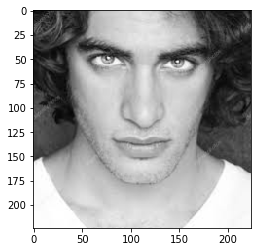

In [10]:
img_array = cv2.imread('./open_man_3.jpg',cv2.IMREAD_GRAYSCALE) 
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR) 
new_array = cv2.resize(backtorgb, (224, 224))
plt.imshow(new_array)
X_input = np.array(new_array).reshape(1, 224, 224, 3) 
X_input.shape 
X_input = X_input/255.0 
prediction = new_model.predict(X_input) 
print(prediction)

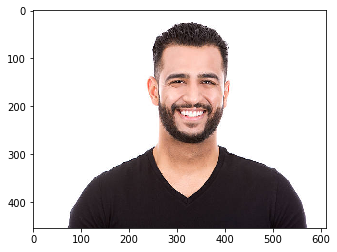

In [80]:
img = cv2.imread('./open_man_4.jpg')
# backtorgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) 
# new_array = cv2.resize(backtorgb, (224, 224))
# plt.imshow(new_array)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [81]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eyeCascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        pass
#         print("eyes not detected")

    else:
        for (ex,ey,ew,eh) in eyess :
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
#             eyes_gray = roi_gray[ey:ey+eh, ex:ex+ew]
            

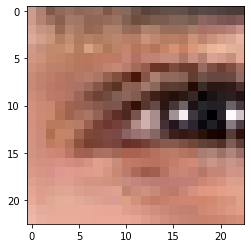

In [82]:
# print(eyes_roi.shape) 
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [83]:
backtorgb = cv2.cvtColor(roi_gray, cv2.COLOR_GRAY2BGR) 
new_array = cv2.resize(eyes_roi, (224, 224))
# plt.imshow(new_array)
X_input = np.array(new_array).reshape(1, 224, 224, 3) 
# X_input.shape 
X_input = X_input/255.0 
print(new_model.predict(X_input)) 

# final_img = cv2.resize(eyes_roi, (224,224))
# final_img = np.expand_dims(final_img, axis=0)
# final_img = final_img/255.0
# print(new_model.predict(final_image)) 

[[0.306683]]


In [84]:
path ="haarcascade_frontalface_default.xml"
faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap =cv2.VideoCapture(1)

if not cap.isOpened():
    cap =cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret,frame =cap.read()
    eye_cascade =cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes =eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h ,x:x+w]
        roi_color =frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess =eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("Eye are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi =roi_color[ey:ey+eh,ex:ex+ew]
    final_image =cv2.resize(eyes_roi,(224,224))
    final_image =np.expand_dims(final_image,axis=0)
    final_image =final_image/255.0
    Predicions =new_model.predict(final_image)
    if(Predicions>0.1):
        status ="Open Eyes"
    else:
        status ="Closed Eyes"
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces =faceCascade.detectMultiScale(gray,1.1,4)
 
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
  

 
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Eye state detection',frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

False
False
False
Eye are not detected
False
Eye are not detected
False
Eye are not detected
False
Eye are not detected
Eye are not detected
False
Eye are not detected
False
Eye are not detected
False
False
Eye are not detected
False
Eye are not detected
False
False
Eye are not detected
False
False
False
Eye are not detected
False
Eye are not detected
False


In [85]:
cap = cv2.VideoCapture(0)
faceCascade =cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade =cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

while True:
    ret,frame = cap.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),5)
        roi_gray = gray[y:y+w,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray,1.3,5)
        for ex,ey,ew,eh in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            eyes_roi =roi_color[ey:ey+eh,ex:ex+ew]
#             plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))
            
    
    final_image =cv2.resize(eyes_roi,(224,224))
    final_image =np.expand_dims(final_image,axis=0)
    final_image =final_image/255.0
    Predicions =new_model.predict(final_image)
    if(Predicions>0.1):
        status ="Open Eyes"
    else:
        status ="Closed Eyes"
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    font = cv2.FONT_HERSHEY_SIMPLEX
  

 
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Eye state detection',frame)
    
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()